In [1]:
import polars as pl
from pathlib import Path
import matplotlib.pyplot as plt
import sys
import ase
from ase.units import Hartree, kcal, mol

from dftmp2bench.pareto import is_pareto_efficient



In [24]:

FONTSIZE = 15

HF_color = "maroon"
GGADFT_color = "lightred"
MGGADFT_color = "orange"
HDFT_color = "chartreuse"
DHDFT_color = "forestgreen"
MP_color = "wheat"
CC_color = "gold"
###
HF=  "HF" 
GGADFT=  "GGADFT" 
MGGADFT=  "mGGA" 
HDFT=  "HDFT" 
DHDFT=  "DHDFT"
MP=  "MP" 
CC=  "CC" 
####
HF_marker = "o"
GGADFT_marker = "t"
MGGADFT_marker = "s"
HDFT_marker = "p"
DHDFT_marker = "h"
MP_marker = "P"
CC_marker = "*"
####
main_pareto_front_color = "black"
main_pareto_line_style = "--"
####
style_dict = {
'wb97xd3': (HDFT_marker, HDFT_color),
    'camb3lyp': (HDFT_marker, HDFT_color),
    'dlpnoccsdt': (CC_marker, CC_color),
    'r2scan-3c': (MGGADFT_marker,MGGADFT_color),
    'wb97xd3bj': (HDFT_marker, HDFT_color),
       'pbe0': (HDFT_marker, HDFT_color),
    'hf': (HF_marker, HF_color),
    'PBEh-3c': (HDFT_marker, HDFT_color),
    'b2plyp': (DHDFT_marker, DHDFT_color), 
    'rimp2': (MP_marker, MP_color),
    'm062x': (HDFT_marker, HDFT_color),
    'wb97xv': (HDFT_marker, HDFT_color),
       'b973c': (HDFT_marker, HDFT_color),
    'ccsd': (CC_marker, CC_color),
    'mp2': (MP_marker, MP_color),
}
####
lot_type_dict = {
'wb97xd3': HDFT,
    'camb3lyp': HDFT,
    'dlpnoccsdt': CC,
    'r2scan-3c': MGGADFT,
    'wb97xd3bj': HDFT,
       'pbe0': HDFT,
    'hf': HF,
    'PBEh-3c': HDFT,
    'b2plyp': DHDFT,
    'rimp2': MP,
    'm062x': HDFT,
    'wb97xv': HDFT,
       'b973c': HDFT,
    'ccsd': CC,
    'mp2': MP,
}
###
theory_type_style_dict = {
    'mGGA': (MGGADFT_marker,MGGADFT_color),
    'HF': (HF_marker, HF_color),
    'DHDFT': (DHDFT_marker, DHDFT_color), 
       'HDFT': (HDFT_marker, HDFT_color),
    'CC': (CC_marker, CC_color),
    'MP': (MP_marker, MP_color),
}



In [25]:
project_path = Path("/cluster/home/schmidtn/master/wahlprak/dftmp2bench")
csv_path = project_path / "csvs" / "OutputSummary-2025-01-27.csv"


# REF_ENERGY = -25420.402056 # TODO: change

In [52]:
REF_LOT = "dlpnoccsdt" #"mp2"
REF_BASIS = "ccpvdz" #"6311++g2d2p"

# REF_LOT = "mp2"
# REF_BASIS = "6311++g2d2p"


q = (
    pl.scan_csv(csv_path)
    # .filter(pl.col("sepal_length") > 5)
    # .group_by("species")
    # .agg(pl.all().sum())
)

df = q.collect()

REF_ENERGY = df.filter(
    (pl.col("level_of_theory") == REF_LOT) & (pl.col("basis") == REF_BASIS ) #& pl.col("basis").str.contains("\+\+") 
)["energy"][0]
REF_ENERGY

-25410.280680315704

In [53]:
df.filter(
    (pl.col("level_of_theory") == "mp2") & (pl.col("nbasis") > 0) #& pl.col("basis").str.contains("\+\+") 
)

name,software,wall_time,basis,level_of_theory,energy,nbasis
str,str,f64,str,str,f64,i64
"""/cluster/home/schmidtn/master/…","""orca""",1452.809,"""def2svp""","""mp2""",-25382.874663,381
"""/cluster/home/schmidtn/master/…","""gaussian""",2396.9,"""def2svp""","""mp2""",-25382.873759,381
"""/cluster/home/schmidtn/master/…","""orca""",6773.773,"""def2svpd""","""mp2""",-25388.591679,576
"""/cluster/home/schmidtn/master/…","""orca""",1800.677,"""ccpvdz""","""mp2""",-25403.943883,381
"""/cluster/home/schmidtn/master/…","""gaussian""",2630.6,"""ccpvdz""","""mp2""",-25403.942634,381
…,…,…,…,…,…,…
"""/cluster/home/schmidtn/master/…","""orca""",3504.78,"""631+gdp""","""mp2""",-25403.788787,457
"""/cluster/home/schmidtn/master/…","""gaussian""",3371.0,"""631+gdp""","""mp2""",-25404.72798,476
"""/cluster/home/schmidtn/master/…","""gaussian""",14496.9,"""6311++g2d2p""","""mp2""",-25420.402056,743


In [54]:
df = df.sort(["software", "level_of_theory", "basis"])

df = df.with_columns(
    unsigned_error=abs(pl.col("energy") - REF_ENERGY),
    signed_error=pl.col("energy") - REF_ENERGY,
    relative_wall_time= pl.col("wall_time") / 14496.9,
)

theory_type = [lot_type_dict[_] for _ in df["level_of_theory"]]
df = df.with_columns(theory_type = theory_type
)

df = df.with_columns(
    unsigned_error_kcalmol = pl.col("unsigned_error") / (kcal/mol),
    signed_error_kcalmol = pl.col("signed_error") / (kcal/mol)
)

df

name,software,wall_time,basis,level_of_theory,energy,nbasis,unsigned_error,signed_error,relative_wall_time,theory_type,unsigned_error_kcalmol,signed_error_kcalmol
str,str,f64,str,str,f64,i64,f64,f64,f64,list[str],f64,f64
"""/cluster/home/schmidtn/master/…","""gaussian""",4392.6,"""631+gd""","""b2plyp""",-25425.492624,407,15.211943,-15.211943,0.303003,"[""DHDFT"", ""DHDFT"", … ""HDFT""]",350.795753,-350.795753
"""/cluster/home/schmidtn/master/…","""gaussian""",5007.3,"""631+gdp""","""b2plyp""",-25426.77686,476,16.49618,-16.49618,0.345405,"[""DHDFT"", ""DHDFT"", … ""HDFT""]",380.410955,-380.410955
"""/cluster/home/schmidtn/master/…","""gaussian""",19182.6,"""6311++g2d2p""","""b2plyp""",-25433.065681,743,22.785001,-22.785001,1.323221,"[""DHDFT"", ""DHDFT"", … ""HDFT""]",525.434604,-525.434604
"""/cluster/home/schmidtn/master/…","""gaussian""",3668.2,"""ccpvdz""","""b2plyp""",-25426.541292,381,16.260612,-16.260612,0.253033,"[""DHDFT"", ""DHDFT"", … ""HDFT""]",374.978615,-374.978615
"""/cluster/home/schmidtn/master/…","""gaussian""",3120.1,"""def2svp""","""b2plyp""",-25406.254485,381,4.026196,4.026196,0.215225,"[""DHDFT"", ""DHDFT"", … ""HDFT""]",92.846278,92.846278
…,…,…,…,…,…,…,…,…,…,…,…,…
"""/cluster/home/schmidtn/master/…","""orca""",4636.984,"""ccpvtzf12""","""wb97xv""",-25481.633995,1421,71.353314,-71.353314,0.31986,"[""DHDFT"", ""DHDFT"", … ""HDFT""]",1645.446534,-1645.446534
"""/cluster/home/schmidtn/master/…","""orca""",668.147,"""def2svp""","""wb97xv""",-25451.98964,381,41.70896,-41.70896,0.046089,"[""DHDFT"", ""DHDFT"", … ""HDFT""]",961.831467,-961.831467
"""/cluster/home/schmidtn/master/…","""orca""",1378.334,"""def2svpd""","""wb97xv""",-25454.015023,576,43.734342,-43.734342,0.095078,"[""DHDFT"", ""DHDFT"", … ""HDFT""]",1008.537899,-1008.537899


In [55]:
def func2(x):
    return lot_type_dict[x]


df = df.with_columns(theory_type = pl.col("level_of_theory").replace_strict(lot_type_dict)
)
# df[["level_of_theory", "theory_type"]].unique()
df

name,software,wall_time,basis,level_of_theory,energy,nbasis,unsigned_error,signed_error,relative_wall_time,theory_type,unsigned_error_kcalmol,signed_error_kcalmol
str,str,f64,str,str,f64,i64,f64,f64,f64,str,f64,f64
"""/cluster/home/schmidtn/master/…","""gaussian""",4392.6,"""631+gd""","""b2plyp""",-25425.492624,407,15.211943,-15.211943,0.303003,"""DHDFT""",350.795753,-350.795753
"""/cluster/home/schmidtn/master/…","""gaussian""",5007.3,"""631+gdp""","""b2plyp""",-25426.77686,476,16.49618,-16.49618,0.345405,"""DHDFT""",380.410955,-380.410955
"""/cluster/home/schmidtn/master/…","""gaussian""",19182.6,"""6311++g2d2p""","""b2plyp""",-25433.065681,743,22.785001,-22.785001,1.323221,"""DHDFT""",525.434604,-525.434604
"""/cluster/home/schmidtn/master/…","""gaussian""",3668.2,"""ccpvdz""","""b2plyp""",-25426.541292,381,16.260612,-16.260612,0.253033,"""DHDFT""",374.978615,-374.978615
"""/cluster/home/schmidtn/master/…","""gaussian""",3120.1,"""def2svp""","""b2plyp""",-25406.254485,381,4.026196,4.026196,0.215225,"""DHDFT""",92.846278,92.846278
…,…,…,…,…,…,…,…,…,…,…,…,…
"""/cluster/home/schmidtn/master/…","""orca""",4636.984,"""ccpvtzf12""","""wb97xv""",-25481.633995,1421,71.353314,-71.353314,0.31986,"""HDFT""",1645.446534,-1645.446534
"""/cluster/home/schmidtn/master/…","""orca""",668.147,"""def2svp""","""wb97xv""",-25451.98964,381,41.70896,-41.70896,0.046089,"""HDFT""",961.831467,-961.831467
"""/cluster/home/schmidtn/master/…","""orca""",1378.334,"""def2svpd""","""wb97xv""",-25454.015023,576,43.734342,-43.734342,0.095078,"""HDFT""",1008.537899,-1008.537899


In [56]:
df[["software", "level_of_theory", "basis", "wall_time", "energy", "unsigned_error"]]

software,level_of_theory,basis,wall_time,energy,unsigned_error
str,str,str,f64,f64,f64
"""gaussian""","""b2plyp""","""631+gd""",4392.6,-25425.492624,15.211943
"""gaussian""","""b2plyp""","""631+gdp""",5007.3,-25426.77686,16.49618
"""gaussian""","""b2plyp""","""6311++g2d2p""",19182.6,-25433.065681,22.785001
"""gaussian""","""b2plyp""","""ccpvdz""",3668.2,-25426.541292,16.260612
"""gaussian""","""b2plyp""","""def2svp""",3120.1,-25406.254485,4.026196
…,…,…,…,…,…
"""orca""","""wb97xv""","""ccpvtzf12""",4636.984,-25481.633995,71.353314
"""orca""","""wb97xv""","""def2svp""",668.147,-25451.98964,41.70896
"""orca""","""wb97xv""","""def2svpd""",1378.334,-25454.015023,43.734342


In [57]:
df["level_of_theory"].unique().to_numpy()

array(['rimp2', 'b2plyp', 'pbe0', 'b973c', 'r2scan-3c', 'mp2', 'wb97xv',
       'wb97xd3bj', 'm062x', 'camb3lyp', 'PBEh-3c', 'wb97xd3',
       'dlpnoccsdt', 'ccsd', 'hf'], dtype=object)

In [58]:
df["basis"].unique()

basis
str
"""ccpvtzf12"""
"""631+gd"""
"""ccpvdz"""
"""def2svp"""
"""def2tzvpp"""
"""sto3g"""
"""6311++g2d2p"""
"""ccpvdzpp"""
"""def2svpd"""


In [59]:
df["nbasis"].describe()

statistic,value
str,f64
"""count""",148.0
"""null_count""",0.0
"""mean""",514.52027
"""std""",286.33479
"""min""",118.0
"""25%""",381.0
"""50%""",450.0
"""75%""",576.0
"""max""",1421.0


In [60]:
_df = df

In [61]:
is_pareto_efficient?

Signature: is_pareto_efficient(costs, return_mask=True)
Docstring:
Find the pareto-efficient points
:param costs: An (n_points, n_costs) array
:param return_mask: True to return a mask
:return: An array of indices of pareto-efficient points.
    If return_mask is True, this will be an (n_points, ) boolean array
    Otherwise it will be a (n_efficient_points, ) integer array of indices.
File:      ~/master/wahlprak/dftmp2bench/dftmp2bench/pareto.py
Type:      function

In [62]:
# pareto_front.sort(["relative_wall_time", "unsigned_error_kcalmol"])

HDFT
DHDFT
HF
mGGA
MP
CC


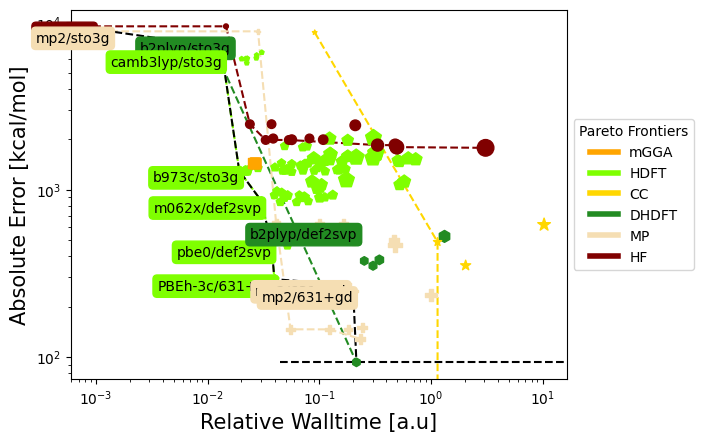

In [63]:

for v in df["theory_type"].unique():
    print(v)

    _df = _df.filter(
                 ~(pl.col("basis") == REF_BASIS) & (pl.col("level_of_theory") == REF_LOT)
            )

    _df = df.filter((pl.col("theory_type") == v))
    # print(_df)
    plt.scatter(_df["relative_wall_time"], _df["unsigned_error_kcalmol"],
                s=(_df["nbasis"])/10,
                c=theory_type_style_dict[v][1],
                marker=theory_type_style_dict[v][0],
               )

    _pf = _df.filter(
        is_pareto_efficient(
            _df[["unsigned_error_kcalmol", "wall_time"]].to_numpy())
    ).sort(["relative_wall_time", "unsigned_error_kcalmol"])
    # print(_pf, color)
    plt.plot(_pf["relative_wall_time"], 
             _pf["unsigned_error_kcalmol"], 
             zorder=-1,
             linestyle=main_pareto_line_style,
            c=theory_type_style_dict[v][1],
             alpha=1,
            )


values_to_compare = df.filter(
                 (pl.col("basis") != REF_BASIS) & (pl.col("level_of_theory") != REF_LOT)
            )

values_to_compare_pf = values_to_compare.filter(
    is_pareto_efficient(
        values_to_compare[["unsigned_error_kcalmol", "wall_time"]].to_numpy())
).sort(["relative_wall_time", "unsigned_error_kcalmol"])

plt.plot(values_to_compare_pf["relative_wall_time"], 
         values_to_compare_pf["unsigned_error_kcalmol"], 
         zorder=-1,
         linestyle=main_pareto_line_style,
        c=main_pareto_front_color,
         alpha=1,
        )




min_USEkcalmol = min(values_to_compare_pf["unsigned_error_kcalmol"])

min_USEkcalmol_rel_wall_time = values_to_compare_pf.filter(pl.col("unsigned_error_kcalmol") == min_USEkcalmol)["relative_wall_time"][0]

ax = plt.gca()



# for _ in values_to_compare_pf.iter_rows():

zipped_vals = zip(*values_to_compare_pf[["theory_type", "relative_wall_time", "unsigned_error_kcalmol", "basis", "level_of_theory"]])
for theory, x, y, basis, level_of_theory in zipped_vals:
    shift_ = 0
    if theory == "DHDFT":
        shift_ = 0.5    
    ax.text(x + shift_/100, y + shift_*10**3, f"{level_of_theory}/{basis}", 
            horizontalalignment='right',
            verticalalignment='top',
            bbox=dict(boxstyle="round",
                   ec=theory_type_style_dict[theory][1],
                   fc=theory_type_style_dict[theory][1],
                     )
           )

ax.set_xscale("log")
ax.axhline(min_USEkcalmol, xmin=0.422, xmax=1, zorder=-1,
           linestyle=main_pareto_line_style,
        c=main_pareto_front_color,
           alpha=1,
        )



ax.set_yscale("log")
ax.set_xlabel("Relative Walltime [a.u]", fontsize=FONTSIZE)
ax.set_ylabel("Absolute Error [kcal/mol]", fontsize=FONTSIZE)

from matplotlib.lines import Line2D
from matplotlib.patches import Patch
legend_elements = [Line2D([0], [0], color=theory_type_style_dict[v][1], lw=4, label=v) for v in df["theory_type"].unique()]
# # Create the figure
# fig, ax = plt.subplots()
ax.legend(handles=legend_elements, title="Pareto Frontiers", loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("test2.pdf", bbox_inches="tight")

In [64]:
values_to_compare_pf

name,software,wall_time,basis,level_of_theory,energy,nbasis,unsigned_error,signed_error,relative_wall_time,theory_type,unsigned_error_kcalmol,signed_error_kcalmol
str,str,f64,str,str,f64,i64,f64,f64,f64,str,f64,f64
"""/cluster/home/schmidtn/master/…","""gaussian""",13.7,"""sto3g""","""hf""",-24999.642933,118,410.637747,410.637747,0.000945,"""HF""",9469.531483,9469.531483
"""/cluster/home/schmidtn/master/…","""gaussian""",19.5,"""sto3g""","""mp2""",-25027.014006,118,383.266674,383.266674,0.001345,"""MP""",8838.339546,8838.339546
"""/cluster/home/schmidtn/master/…","""gaussian""",162.0,"""sto3g""","""b2plyp""",-25097.92736,118,312.35332,312.35332,0.011175,"""DHDFT""",7203.038736,7203.038736
"""/cluster/home/schmidtn/master/…","""gaussian""",195.9,"""sto3g""","""camb3lyp""",-25133.97434,118,276.30634,276.30634,0.013513,"""HDFT""",6371.775616,6371.775616
"""/cluster/home/schmidtn/master/…","""orca""",278.528,"""sto3g""","""b973c""",-25466.433325,450,56.152645,-56.152645,0.019213,"""HDFT""",1294.910755,-1294.910755
…,…,…,…,…,…,…,…,…,…,…,…,…
"""/cluster/home/schmidtn/master/…","""orca""",542.433,"""def2svp""","""pbe0""",-25430.438628,381,20.157948,-20.157948,0.037417,"""HDFT""",464.853331,-464.853331
"""/cluster/home/schmidtn/master/…","""orca""",574.798,"""631+gd""","""PBEh-3c""",-25422.929484,331,12.648804,-12.648804,0.03965,"""HDFT""",291.688342,-291.688342
"""/cluster/home/schmidtn/master/…","""orca""",2554.216,"""631+gd""","""mp2""",-25398.58219,388,11.69849,11.69849,0.17619,"""MP""",269.773594,269.773594


##### plt.plot(values_to_compare_pf["relative_wall_time"], values_to_compare_pf["unsigned_error_kcalmol"])


In [65]:
values_to_compare_pf

name,software,wall_time,basis,level_of_theory,energy,nbasis,unsigned_error,signed_error,relative_wall_time,theory_type,unsigned_error_kcalmol,signed_error_kcalmol
str,str,f64,str,str,f64,i64,f64,f64,f64,str,f64,f64
"""/cluster/home/schmidtn/master/…","""gaussian""",13.7,"""sto3g""","""hf""",-24999.642933,118,410.637747,410.637747,0.000945,"""HF""",9469.531483,9469.531483
"""/cluster/home/schmidtn/master/…","""gaussian""",19.5,"""sto3g""","""mp2""",-25027.014006,118,383.266674,383.266674,0.001345,"""MP""",8838.339546,8838.339546
"""/cluster/home/schmidtn/master/…","""gaussian""",162.0,"""sto3g""","""b2plyp""",-25097.92736,118,312.35332,312.35332,0.011175,"""DHDFT""",7203.038736,7203.038736
"""/cluster/home/schmidtn/master/…","""gaussian""",195.9,"""sto3g""","""camb3lyp""",-25133.97434,118,276.30634,276.30634,0.013513,"""HDFT""",6371.775616,6371.775616
"""/cluster/home/schmidtn/master/…","""orca""",278.528,"""sto3g""","""b973c""",-25466.433325,450,56.152645,-56.152645,0.019213,"""HDFT""",1294.910755,-1294.910755
…,…,…,…,…,…,…,…,…,…,…,…,…
"""/cluster/home/schmidtn/master/…","""orca""",542.433,"""def2svp""","""pbe0""",-25430.438628,381,20.157948,-20.157948,0.037417,"""HDFT""",464.853331,-464.853331
"""/cluster/home/schmidtn/master/…","""orca""",574.798,"""631+gd""","""PBEh-3c""",-25422.929484,331,12.648804,-12.648804,0.03965,"""HDFT""",291.688342,-291.688342
"""/cluster/home/schmidtn/master/…","""orca""",2554.216,"""631+gd""","""mp2""",-25398.58219,388,11.69849,11.69849,0.17619,"""MP""",269.773594,269.773594


In [17]:
for theory, x, y, basis, method in zip(*values_to_compare_pf[["theory_type", "relative_wall_time", "unsigned_error_kcalmol", "basis", "level_of_theory"]]):
    print(theory, x, y, basis, method)

NameError: name 'values_to_compare_pf' is not defined

In [68]:
df.filter(
    (pl.col("software") == "gaussian") #& (pl.col("nbasis") > 0) #& pl.col("basis").str.contains("\+\+") 
)["wall_time"].describe()

statistic,value
str,f64
"""count""",41.0
"""null_count""",0.0
"""mean""",3574.519512
"""std""",4174.457369
"""min""",13.7
"""25%""",822.0
"""50%""",2098.5
"""75%""",4825.7
"""max""",19182.6


Text(0.5, 0, 'log Number of basis functions')

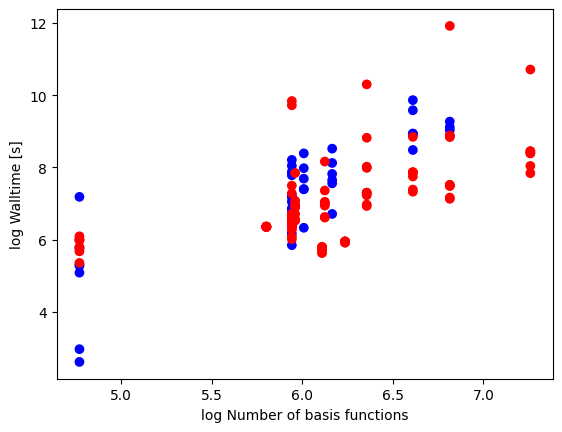

In [87]:
import numpy as np

plt.scatter(np.log(df["nbasis"]), np.log(df["wall_time"]), c=["r" if _ == "orca" else "b" for _ in df["software"]])
# plt.xscale("log")
# plt.yscale("log")
plt.ylabel("log Walltime [s]")
plt.xlabel("log Number of basis functions")

In [80]:
from scipy.stats import linregress

1.871660809778196 -3.7842055245098036
1.0181379646029864 0.4851429373314895


(0.0, 5.0)

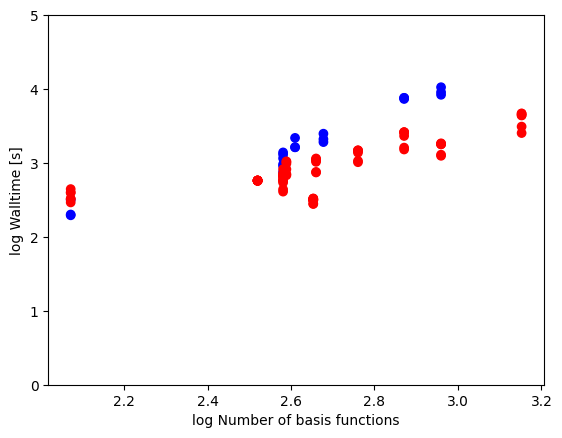

In [101]:
TYPE = "HDFT"
_ = df.filter(
    (pl.col("software") == "gaussian") & (pl.col("theory_type") == TYPE) #& pl.col("basis").str.contains("\+\+") 
)
slope, intercept, r, p, se = linregress(np.log(_["nbasis"]), np.log(_["wall_time"]))
print(slope, intercept)
plt.scatter(np.log10(_["nbasis"]), np.log10(_["wall_time"]), c=["r" if x == "orca" else "b" for x in _["software"]])
# plt.xscale("log")
# plt.yscale("log")
plt.ylabel("log Walltime [s]")
plt.xlabel("log Number of basis functions")
plt.ylim(0, 10)
_ = df.filter(
    (pl.col("software") == "orca") & (pl.col("theory_type") == TYPE) #& (pl.col("nbasis") > 0) #& pl.col("basis").str.contains("\+\+") 
)
slope, intercept, r, p, se = linregress(np.log(_["nbasis"]), np.log(_["wall_time"]))
print(slope, intercept)
plt.scatter(np.log10(_["nbasis"]), np.log10(_["wall_time"]), c=["r" if x == "orca" else "b" for x in _["software"]])
# plt.xscale("log")
# plt.yscale("log")
plt.ylabel("log Walltime [s]")
plt.xlabel("log Number of basis functions")
plt.ylim(0, 5)


nan nan
2.3640788886566946 -4.3666931048773385


/cluster/home/schmidtn/master/wahlprak/dftmp2bench/.venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:10729: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/cluster/home/schmidtn/master/wahlprak/dftmp2bench/.venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:10743: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/cluster/home/schmidtn/master/wahlprak/dftmp2bench/.venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:10749: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


(0.0, 10.0)

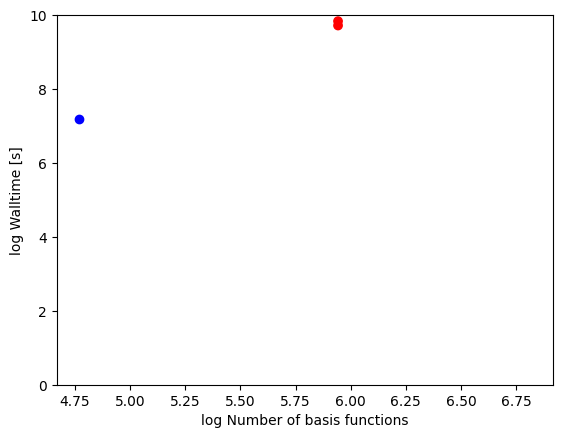

In [98]:
TYPE = "CC"
_ = df.filter(
    (pl.col("software") == "gaussian") & (pl.col("theory_type") == TYPE) #& pl.col("basis").str.contains("\+\+") 
)
slope, intercept, r, p, se = linregress(np.log(_["nbasis"]), np.log(_["wall_time"]))
print(slope, intercept)
plt.scatter(np.log(_["nbasis"]), np.log(_["wall_time"]), c=["r" if x == "orca" else "b" for x in _["software"]])
# plt.xscale("log")
# plt.yscale("log")
plt.ylabel("log Walltime [s]")
plt.xlabel("log Number of basis functions")
plt.ylim(0, 10)
_ = df.filter(
    (pl.col("software") == "orca") & (pl.col("theory_type") == TYPE) #& (pl.col("nbasis") > 0) #& pl.col("basis").str.contains("\+\+") 
)
slope, intercept, r, p, se = linregress(np.log(_["nbasis"]), np.log(_["wall_time"]))
print(slope, intercept)
plt.scatter(np.log10(_["nbasis"]), np.log10(_["wall_time"]), c=["r" if x == "orca" else "b" for x in _["software"]])
# plt.xscale("log")
# plt.yscale("log")
plt.ylabel("log Walltime [s]")
plt.xlabel("log Number of basis functions")
plt.ylim(0, 10)